In [1]:
import pandas as pd
#Specify the file name
file_name="mydataset.csv"
#Load CSV file
df=pd.read_csv(file_name)
print(df.head())
print(df.tail())
#Get the shape
print(df.shape)
#Describe the numerical columns
print(df.describe())
#Display column headers with data types
print(df.columns)
print(df.dtypes)
df.to_csv("mydataset.csv",index=False)


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
        Rank                                              Name Platform  \
16593  16596                Woody Woodpecker in Crazy Castle 5      GBA   
16594  16597   

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sa

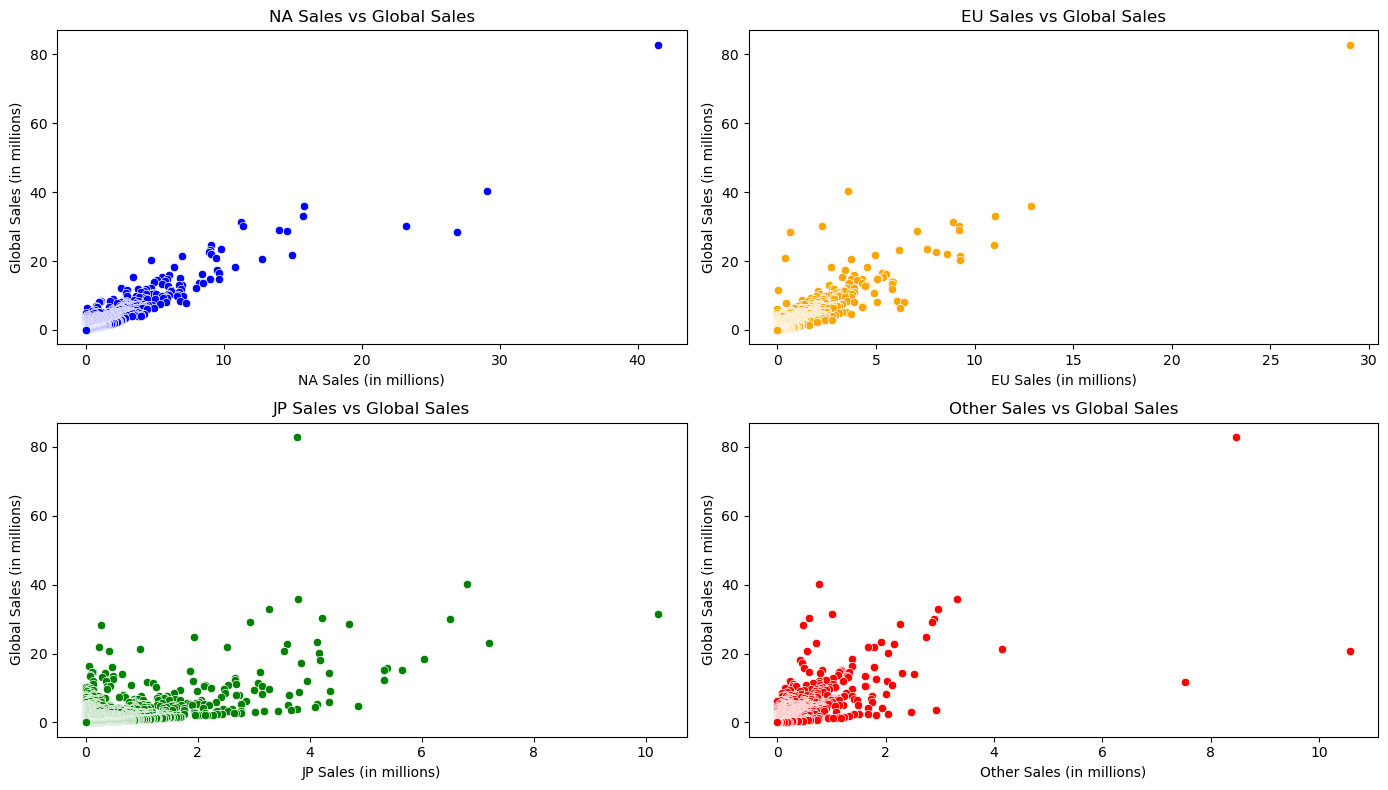

In [3]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Display the first few rows of the dataset
print(df.head())

# Data Cleaning
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values if any
df.dropna(inplace=True)

# Data Visualization
plt.figure(figsize=(14, 8))

# Scatter plot for NA Sales vs Global Sales
plt.subplot(2, 2, 1)
sns.scatterplot(data=df, x='NA_Sales', y='Global_Sales', color='blue')
plt.title('NA Sales vs Global Sales')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('Global Sales (in millions)')

# Scatter plot for EU Sales vs Global Sales
plt.subplot(2, 2, 2)
sns.scatterplot(data=df, x='EU_Sales', y='Global_Sales', color='orange')
plt.title('EU Sales vs Global Sales')
plt.xlabel('EU Sales (in millions)')
plt.ylabel('Global Sales (in millions)')

# Scatter plot for JP Sales vs Global Sales
plt.subplot(2, 2, 3)
sns.scatterplot(data=df, x='JP_Sales', y='Global_Sales', color='green')
plt.title('JP Sales vs Global Sales')
plt.xlabel('JP Sales (in millions)')
plt.ylabel('Global Sales (in millions)')

# Scatter plot for Other Sales vs Global Sales
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='Other_Sales', y='Global_Sales', color='red')
plt.title('Other Sales vs Global Sales')
plt.xlabel('Other Sales (in millions)')
plt.ylabel('Global Sales (in millions)')

plt.tight_layout()
plt.show()

Mean Squared Error: 2.872221244666215e-05
R² Score: 0.9999932860147335


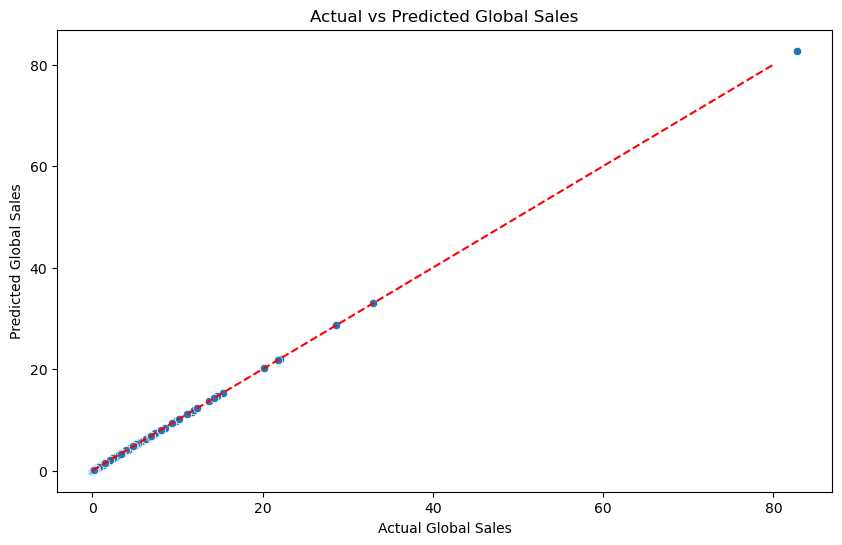

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

# Feature selection
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
target = df['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create linear regression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Global Sales')
plt.ylabel('Predicted Global Sales')
plt.title('Actual vs Predicted Global Sales')
plt.plot([0, 80], [0, 80], '--', color='red')  # Diagonal line
plt.show()

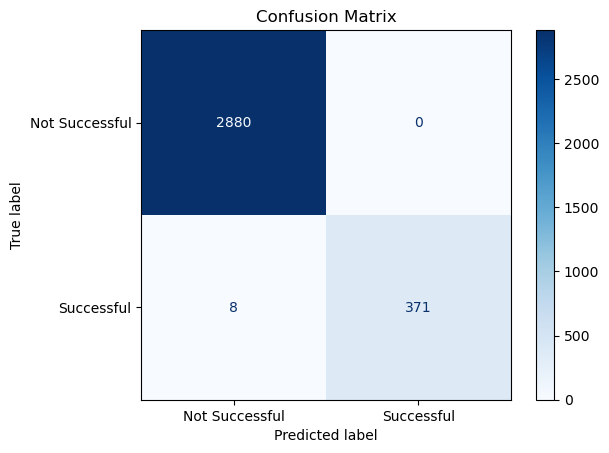

In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

# Feature selection
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
target = (df['Global_Sales'] > 1).astype(int)  # Create a binary target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Successful", "Successful"])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.9975452592819883
Confusion Matrix:
[[2880    0]
 [   8  371]]
ROC AUC: 0.9999386177074172


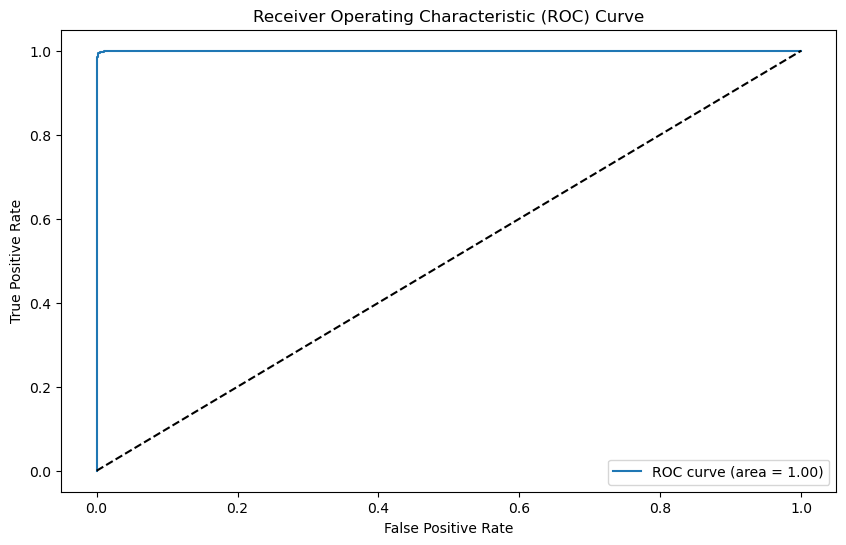

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

# Define a success threshold for global sales
success_threshold = 1.0  # You can adjust this value
df['Success'] = (df['Global_Sales'] > success_threshold).astype(int)

# Feature selection
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
target = df['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create logistic regression model
model = LogisticRegression()

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probability estimates

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'ROC AUC: {roc_auc}')

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Accuracy: 0.9972384166922369
Confusion Matrix:
[[2874    6]
 [   3  376]]
ROC AUC: 0.9999285400175902


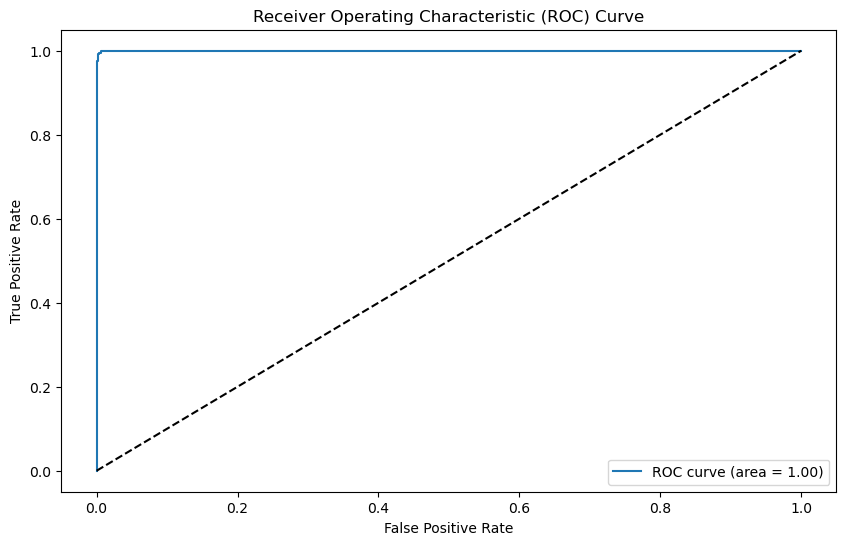

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import xgboost as xgb

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

# Define a success threshold for global sales
success_threshold = 1.0  # You can adjust this value
df['Success'] = (df['Global_Sales'] > success_threshold).astype(int)

# Feature selection
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
target = df['Success']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',
    'eta': 0.1,
    'max_depth': 4,
    'seed': 42
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred = bst.predict(dtest)
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]  # Convert probabilities to binary outcomes

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
roc_auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print(f'ROC AUC: {roc_auc}')

# Plotting ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

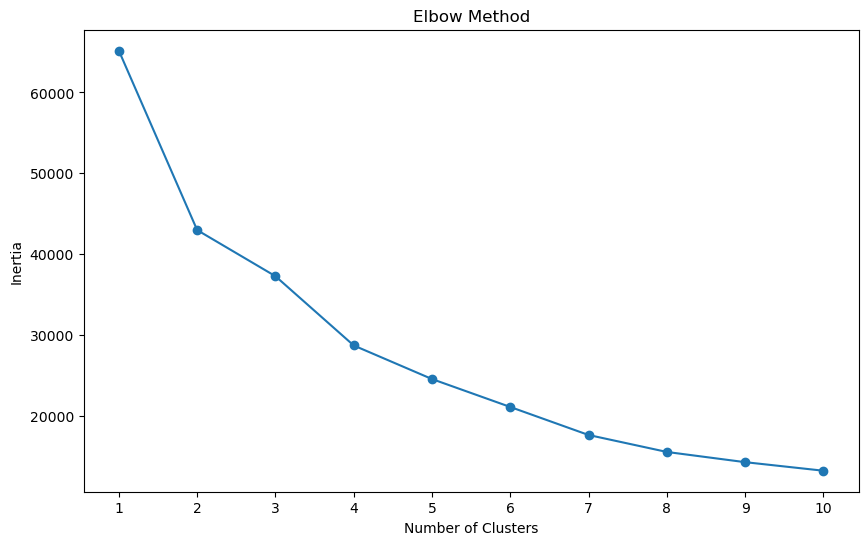

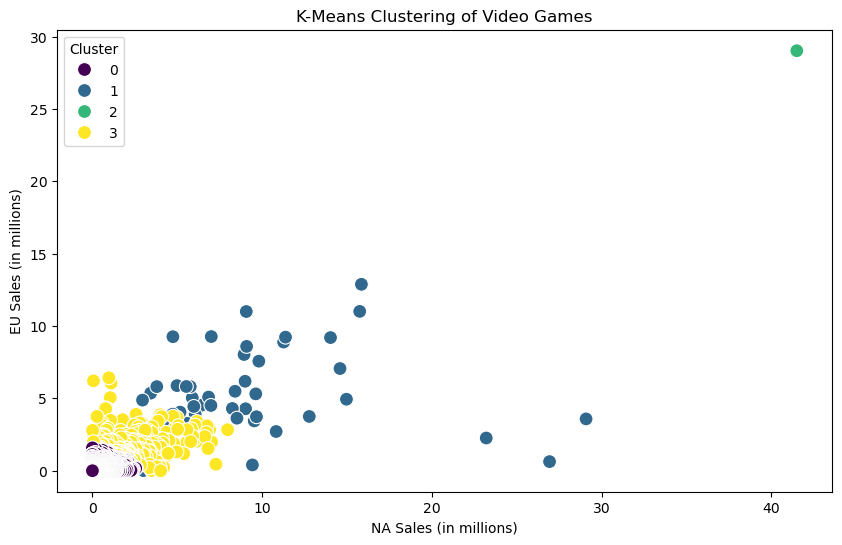

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

# Feature selection for clustering
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

# From the elbow method, choose an optimal number of clusters
optimal_clusters = 4  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Video Games')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.legend(title='Cluster')
plt.show()

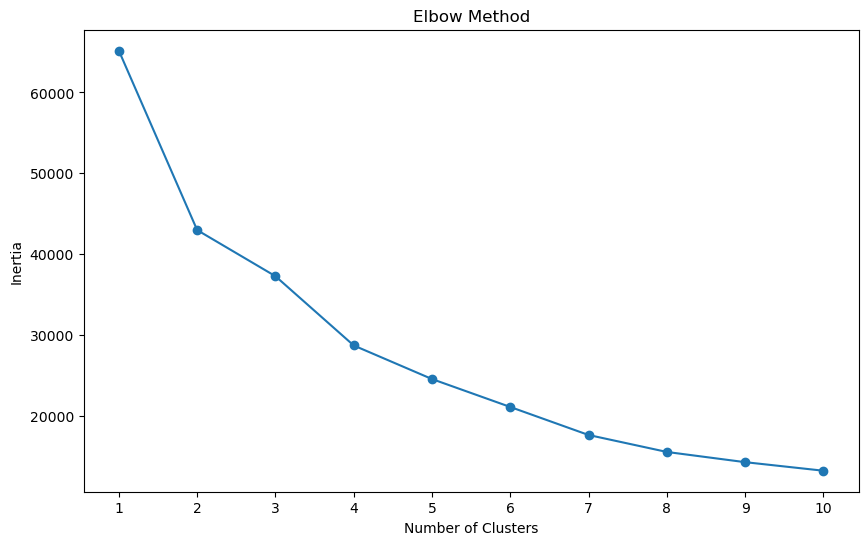

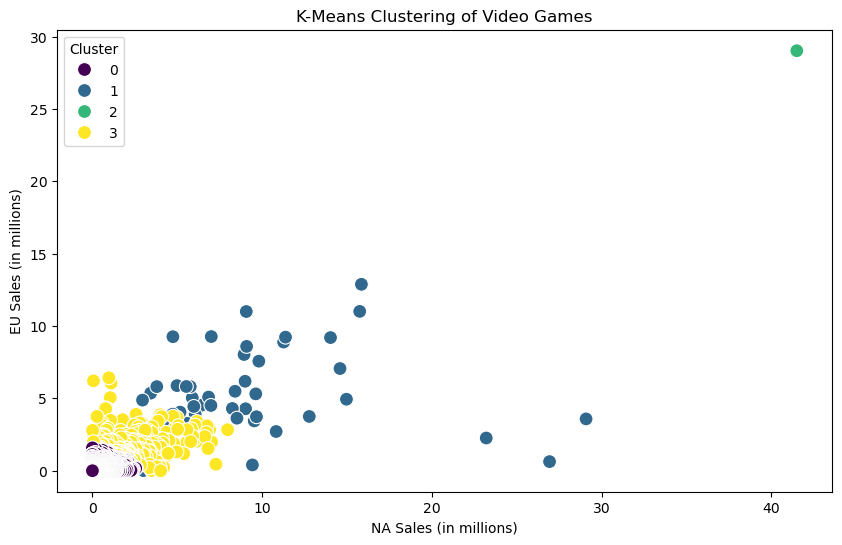

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('mydataset.csv')

# Data Cleaning
df.dropna(inplace=True)  # Drop rows with missing values

# Feature selection for clustering
features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determine the optimal number of clusters using the Elbow method
inertia = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.show()

# From the elbow method, choose an optimal number of clusters
optimal_clusters = 4  # Adjust based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', hue='Cluster', palette='viridis', s=100)
plt.title('K-Means Clustering of Video Games')
plt.xlabel('NA Sales (in millions)')
plt.ylabel('EU Sales (in millions)')
plt.legend(title='Cluster')
plt.show()